<a href="https://colab.research.google.com/github/Weichunchou/PBPK-model-R/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('deSolve')
library('deSolve') # load an add-on package for solving differential equations

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Input the differential equations
# pkmodel is a customized function used to compute the value(s) of derivative(s) of A1 and A2 at a specific time

pkmodel <- function(time, state, parameters) { # state represents a vector of initial values of A1 and A2; 
                                               # parameters represent V1, K12, K21, and K10

  # The with() function applies an expression to a dataset
  with(as.list(c(state, parameters)), {
    dA1 <- - K12 * A1 + K21 * A2 - K10 * A1
    dA2 <- K12 * A1 - K21 * A2
    list(c(dA1, dA2))
  })
}

In [ ]:
state <- c(A1 = 10, A2 = 0) # initial dose is 10 mg in central compartment; initial amount in peripheral compartment is 0 mg
parameters <- c(K12 = 0.45, # /h
                K21 = 0.6, # /h
                K10 = 0.04) # /h

times <- seq(0, 24, 0.02) # simulation start time and end time
out <- ode(y = state,
           times = times,
           func = pkmodel,
           parms = parameters) # solve and compute the differential equations with parameters and initial state values using the ode solver
out <- as.data.frame(out)

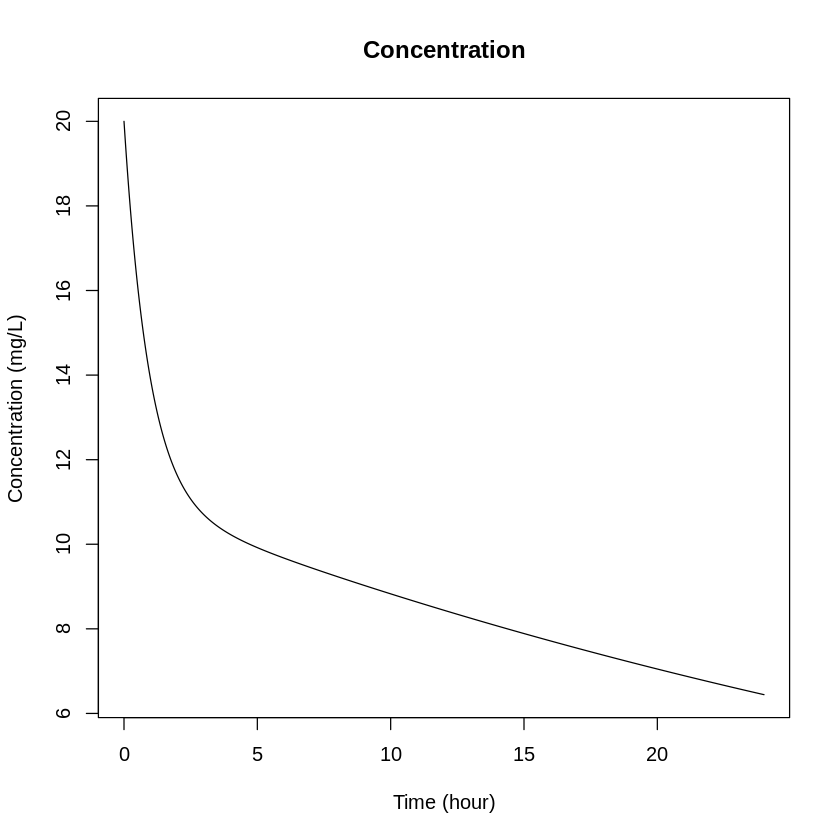

In [ ]:
V1 = 0.5 # L; This constant should be listed/defined separately because it will be used to calculate the concentration C1 = A1/V1 below
         # This parameter does not need to be included in the parameters vector because it is not used in the pkmodel function
plot(out$time, out$A1/V1, main = "Concentration", xlab = "Time (hour)", ylab = "Concentration (mg/L)", type = 'l')